In [33]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("weather_data.csv")
# The first five lines
print(df.head(5))
# Checking for duplicates and missing items
display(df.isna())
print(df.duplicated())
# Convert the date column to datetime values
df["Date"] = pd.to_datetime(df["Date"])

         Date  Temperature  Humidity  WindSpeed Condition
0  2023-01-01           12        65         10     Sunny
1  2023-01-02           15        60         12    Cloudy
2  2023-01-03           14        70          8     Rainy
3  2023-01-04           10        72          5     Rainy
4  2023-01-05           16        55         15     Sunny


,Date,Temperature,Humidity,WindSpeed,Condition
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool


In [34]:
# Create columns for month, day, and temperature description
df["Month"] = df["Date"].dt.month_name()
df["Day"] = df["Date"].dt.day
def temkind(tem):
    if tem < 12:
        return "Cold"
    elif tem >= 12 and tem <= 17:
        return "Warm"
    else:
        return "Hot"
df["Temp_Category"] = df["Temperature"].apply(temkind)
display(df)

,Date,Temperature,Humidity,WindSpeed,Condition,Month,Day,Temp_Category
0,2023-01-01,12,65,10,Sunny,January,1,Warm
1,2023-01-02,15,60,12,Cloudy,January,2,Warm
2,2023-01-03,14,70,8,Rainy,January,3,Warm
3,2023-01-04,10,72,5,Rainy,January,4,Cold
4,2023-01-05,16,55,15,Sunny,January,5,Warm
5,2023-01-06,18,50,14,Sunny,January,6,Hot
6,2023-01-07,13,67,9,Cloudy,January,7,Warm
7,2023-01-08,11,75,6,Rainy,January,8,Cold
8,2023-01-09,17,58,13,Sunny,January,9,Warm
9,2023-01-10,19,53,16,Sunny,January,10,Hot


In [35]:
# Analysis Required
print(f"The average temperature is : {df["Temperature"].mean()}")
c = df["Condition"].value_counts()
print(f"The most frequent weather condition : {c.idxmax()}")
s = df.groupby("Day")["Humidity"].sum()
print(f"The Highest recorded humidity was {s.max()} on The day {s.idxmax()}.")
w = df.groupby("Day")["WindSpeed"].sum()
print(f"The Lowest  Wind Speed was {w.min()} on The day {w.idxmin()}.")

The average temperature is : 14.5
The most frequent weather condition : Sunny
The Highest recorded humidity was 75 on The day 8.
The Lowest  Wind Speed was 5 on The day 4.


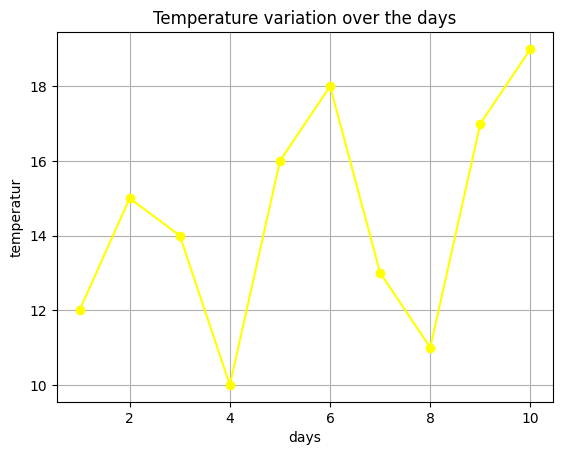

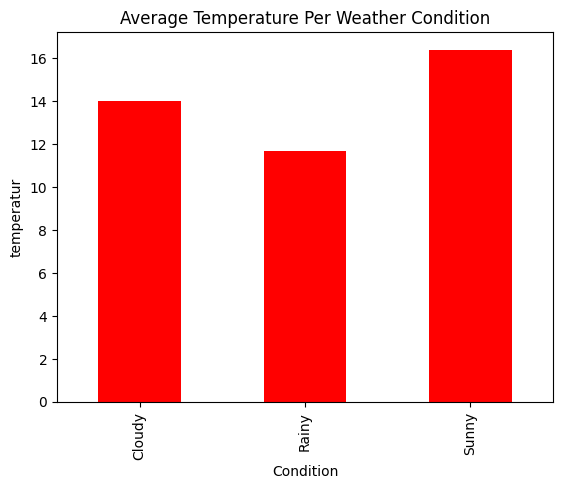

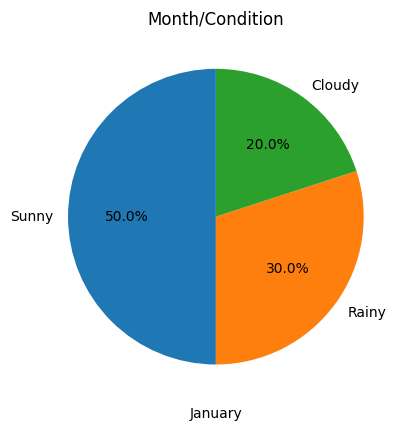

In [36]:
# Visualization
td = df.groupby("Day")["Temperature"].sum()
td.plot(kind = "line", color = "yellow", marker = "o", title="Temperature variation over the days")
plt.grid(True)
plt.xlabel("days")
plt.ylabel("temperatur")
plt.show()

ctm = df.groupby("Condition")["Temperature"].mean()
ctm.plot(kind = "bar", color = "red", title="Average Temperature Per Weather Condition")
plt.xlabel("Condition")
plt.ylabel("temperatur")
plt.show()

cm = df["Condition"].value_counts()
cm.plot(kind="pie", autopct="%1.1f%%", startangle = 90, title="Month/Condition")
plt.xlabel("January")
plt.ylabel('')
plt.show()